# Explore-Then-Commit Algorithm:

## Introduction:

- In the ETC algorithm, the learner explores each arm of the bandit $m$ times. 
- $m$ is chosen in such a way, so as to maximize probability of getting an optimal reward, thus $m$ clearly depends on the horizon given to the learner, $n$. 
- After exploring each arm, the learner choses the arm with highest average reword and commits to that arm for the remaining trials.

## Implementation:

We write a function for ETC with the following inputs: 

- The horizon, $n$. 
- Number of explorations of each arm, $m$.
- The sub-optimality gap of each arm, $\{\Delta_i\}$.

Each arm is explored $m$ times and the learner commits to the arm with the highest average reward. We then find the regret.
    

In [1]:
# Importing required libraries
from math import log, ceil

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [2]:
def ETC(n, m, deltas):
    k = len(deltas) # Number of arms.

    # Initializing mean values of each arm using deltas:
    means = []
    for delta in deltas:
        means.append(-1*delta)

    # Initializing actions, rewards, number of times each action has been played, regrets each round, average rewards, the overall obtained regret and the expected regret:
    actions = np.zeros(n, dtype = int)
    rewards = np.zeros(n)
    action_played = np.zeros(k)
    regrets = np.zeros(n)
    average_rewards = np.zeros(k)
    regret = 0
    exp_regret = max(means)

    # Implementing the algorithm:
    for t in range(n):
        if t <= m*k:
            actions[t] = int(t%k) # tmod(k)+1
            action_played[actions[t]] += 1
            rewards[t] = random.randn()+means[actions[t]] # Gaussian Bandit. (Mean from means, Variance = 1).
            regrets[t] = means[actions[t]]-rewards[t]
            average_rewards[actions[t]] = (average_rewards[actions[t]]*(action_played[actions[t]]-1) + rewards[t])/(action_played[actions[t]])
            a_max = np.argmax(average_rewards) # Picking reward with maximum average reward.
        else:
            actions[t] = a_max # Commit to the action with the largest average reward.
            action_played[a_max] += 1
            rewards[t] = random.randn()+means[a_max]
            regrets[t] = means[actions[t]]-rewards[t]

    regret = sum(regrets)
    exp_regret = sum(deltas*action_played)

    return (a_max, regret, exp_regret)

## Analyzing the Algorithm:

We take the case of two arm bandit to analyze ETC algorithm. WLOG, we take the sub-optimality gap to be $0$ for the first arm and $\Delta \in [0, 1]$ for the second arm. 
The following method is used to understand the algorithm and analyze it's regret:

- Fixing the horizon, $n$, we find $m$ for which the regret is minimized.
- Running ETC multiple times and taking the average regret, we find the expected regret and the $\textit{worst case}$ regret. ($\because$ From CLT, the expected value of regret tends to the mean of the regret values in each experiment, over large number of experiments.)
- We find the expected regret for a range of delta values and compare the result with the worst case regret, obtained from regret analysis of the ETC algorithm.

In [3]:
# Regret Analysis Function: 
# Takes in n, num_of _sims and the deltas and 

def regret_analysis(n, no_of_sims, delta_vals):
    # Initializing expected regret and worst case regret:
    exp_regret = np.zeros(np.size(delta_vals))
    worst_regret = np.zeros(np.size(delta_vals))

    # Running ETC over various delta:
    i = 0 #Iterator.
    for delta in delta_vals:
 
        if delta != 0: # For delta = 0, the expected regret and worst case regret are 0.
            deltas = [0, delta]

            # Finding optimum m for given delta.
            m = max(1, ceil((4/(delta**2))*log(n*((delta**2)/4))))

            # Finding Worst Case Regret for given delta.
            worst_regret[i] = min(n*delta, delta+(4/delta)*(1+max(0, log(n*((delta**2)/4)))))

            # Finding expected regret.
            regret_sum = 0
            for sim in range(no_of_sims):
                a_max, regret_sim, exp_regret_sim = ETC(n, m, deltas)
                regret_sum += exp_regret_sim
            exp_regret[i] = regret_sum/no_of_sims

        #updating interator.
        i += 1

    return  (worst_regret, exp_regret)

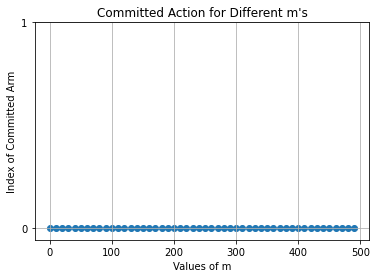

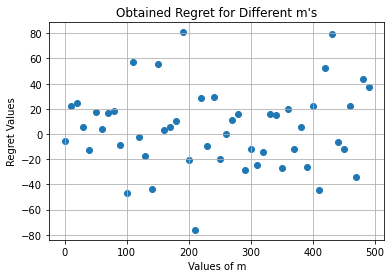

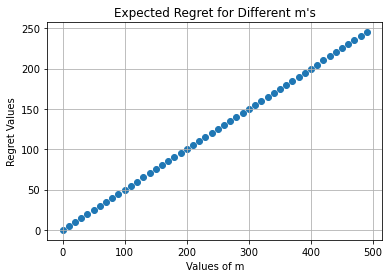

In [4]:
# Results from ETC.

# Values taken from Experiment 6.1 in the book.

# Choosing n:
n = 1000

# Running ETC for n, deltas = [0, 0.5] for different m values.

# Initializing m values, committed actions, regrets, exp_regrets:
m_vals = range(0, 500, 10)
comm_a = np.zeros(len(m_vals))
regrets = np.zeros(len(m_vals))
exp_regrets = np.zeros(len(m_vals))

# Obtaining Outputs:
i = 0 # Iterator.
for m in m_vals:
    comm_a[i], regrets[i], exp_regrets[i] = ETC(n, m, [0, 0.5])
    i += 1

# Plotting the results:
plt.scatter(m_vals, comm_a)
plt.title("Committed Action for Different m's")
plt.xlabel('Values of m')
plt.ylabel('Index of Committed Arm')
plt.yticks([0, 1])
plt.grid()
plt.show()
plt.scatter(m_vals, regrets)
plt.title("Obtained Regret for Different m's")
plt.xlabel('Values of m')
plt.ylabel('Regret Values')
plt.grid()
plt.show()
plt.scatter(m_vals, exp_regrets)
plt.title("Expected Regret for Different m's")
plt.xlabel('Values of m')
plt.ylabel('Regret Values')
plt.grid()
plt.show()

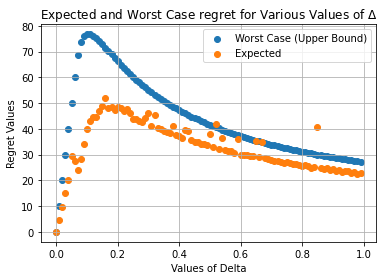

In [5]:
# Regret Analysis.

# Choosing number of simulations and delta values:
no_of_sims = 100 # n = 1e5 in Experiment 6.1 takes very long.
delta_vals = np.arange(0, 1, 0.01)

# Finding expected regret and worst case regret for various delta values:
worst_regret, exp_regret = regret_analysis(n, no_of_sims, delta_vals)

# Plotting and comparing results:
plt.scatter(delta_vals, worst_regret)
plt.scatter(delta_vals, exp_regret)
plt.title("Expected and Worst Case regret for Various Values of $\Delta$")
plt.xlabel('Values of Delta')
plt.ylabel('Regret Values')
plt.legend(['Worst Case (Upper Bound)', 'Expected'])
plt.grid()
plt.show()

## Conclusions:

- We observe from the first set of plots that the regret and expected actually obtained regret are not the same. Regret is a random variable whose expectation is modeled in the second figure, as delta is varied. 
- We can see that the expected value of the regret ($R_n$) is mostly within the worst case upper bound. If we increase the number of simulations, the expected regret is more accurately determined by averaging the expected regrets from each simulation. As the expected regret is $O(\sqrt{n})$, ETC algorithm is a good bandit algorithm.